In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def kmeans(data, k, max_iterations=100):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Assign data points to the closest centroid
        labels = np.argmin(np.array([euclidean_distance(data, centroid) for centroid in centroids]), axis=0)

        # Update centroids by calculating the mean of data points in each cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels



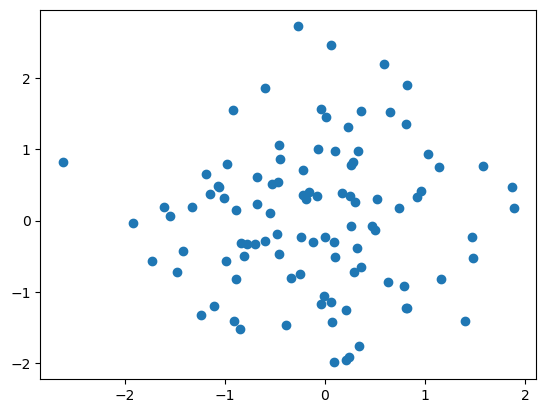

In [3]:
# Example usage:
# if __name__ == "__main__":
# Generate some sample data
np.random.seed(42)
num_samples = 100
data = np.random.randn(num_samples, 2)
data.shape
plt.scatter(data[:, 0], data[:, 1])




In [4]:
# Number of clusters (k)
k = 3

# Run k-means algorithm
centroids, labels = kmeans(data, k)

# Print the centroids and labels of the data points
print("Centroids:")
print(centroids)
print("\nLabels:")
print(labels)

Centroids:
[[[ 0.49671415 -0.1382643 ]
  [ 0.64768854  1.52302986]
  [-0.23415337 -0.23413696]
  [ 1.57921282  0.76743473]
  [-0.46947439  0.54256004]
  [-0.46341769 -0.46572975]
  [ 0.24196227 -1.91328024]
  [-1.72491783 -0.56228753]
  [-1.01283112  0.31424733]
  [-0.90802408 -1.4123037 ]
  [ 1.46564877 -0.2257763 ]
  [ 0.0675282  -1.42474819]
  [-0.54438272  0.11092259]
  [-1.15099358  0.37569802]
  [-0.60063869 -0.29169375]
  [-0.60170661  1.85227818]
  [-0.01349722 -1.05771093]
  [ 0.82254491 -1.22084365]
  [ 0.2088636  -1.95967012]
  [-1.32818605  0.19686124]
  [ 0.73846658  0.17136828]
  [-0.11564828 -0.3011037 ]
  [-1.47852199 -0.71984421]
  [-0.46063877  1.05712223]
  [ 0.34361829 -1.76304016]
  [ 0.32408397 -0.38508228]
  [-0.676922    0.61167629]
  [ 1.03099952  0.93128012]
  [-0.83921752 -0.30921238]
  [ 0.33126343  0.97554513]
  [-0.47917424 -0.18565898]
  [-1.10633497 -1.19620662]
  [ 0.81252582  1.35624003]
  [-0.07201012  1.0035329 ]
  [ 0.36163603 -0.64511975]
  [ 0.361

/tmp/ipykernel_3865/981134661.py:17: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/tmp/ipykernel_3865/981134661.py:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(centroids == new_centroids):


In [23]:
# conda install -c conda-forge kneed

import matplotlib.pyplot as plt
# from kneed import KneeLocator
from sklearn.datasets import make_blobs

from sklearn.preprocessing import StandardScaler

In [37]:
features, true_labels = make_blobs(
    n_samples=5000,
    centers=40,
    cluster_std=2.75,
    random_state=42
)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# plt.scatter(scaled_features[:, 0],scaled_features[:, 1],c= true_labels)
# print(features[:5])
# print(scaled_features[:5])

In [38]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_fit(data,n_clusters=3,n_init=10,max_iter=300):
    kmeans = KMeans(
        init="random",
        random_state=42,
        n_clusters=n_clusters,
        n_init=n_init,
        max_iter=max_iter,
        
    )
    kmeans.fit(data)

    # # The lowest SSE value
    # print(kmeans.inertia_)

    # # Final locations of the centroid
    # print(kmeans.cluster_centers_)

    # # The number of iterations required to converge
    print(f'converged after {kmeans.n_iter_} iterations')

    return kmeans.labels_
labels = kmeans_fit(data = scaled_features,n_clusters=3,n_init=10,max_iter=300)

converged after 20 iterations


In [26]:
# # The lowest SSE value
# print(kmeans.inertia_)

# # Final locations of the centroid
# print(kmeans.cluster_centers_)

# # The number of iterations required to converge
# print(kmeans.n_iter_)

74.57960106819853
[[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]]
2


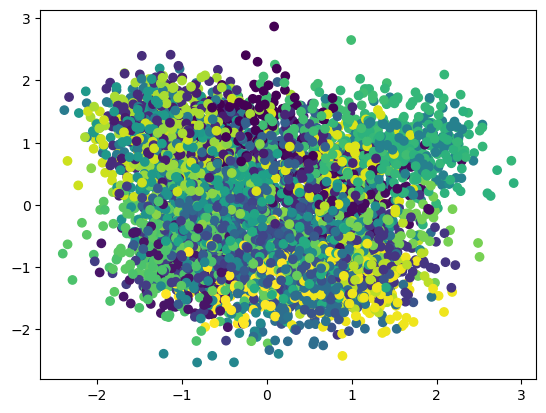

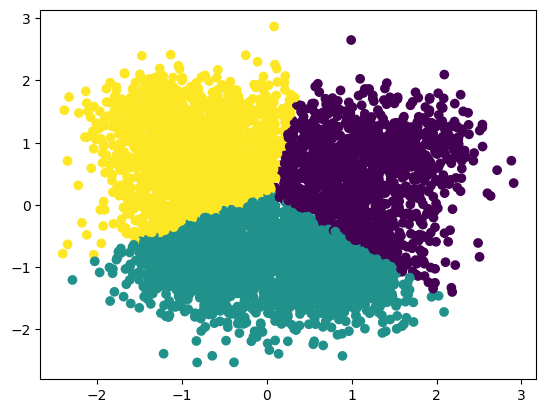

In [39]:
plt.figure()
plt.scatter(scaled_features[:, 0],scaled_features[:, 1],c= true_labels)
# kmeans.labels_[:5]
plt.figure()
plt.scatter(scaled_features[:, 0],scaled_features[:, 1],c= labels)



In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)